Text(0, 0.5, 'y')

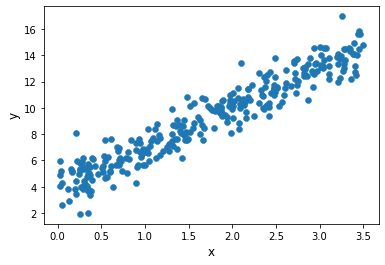

In [112]:
import numpy as np
import matplotlib.pyplot as plt
#Generating linear data

X = 3.5 * np.random.rand(300, 1)
y = 4 + 3 * X + np.random.randn(300, 1)

plt.scatter(X, y, linewidth=0.5)
plt.xlabel("x", fontsize = "12")
plt.ylabel("y", fontsize = "12")

In [113]:
## Computing our parameter theta using the normal equation.

print(len(X), len(y))

#Add bias term in X for all 300 instances
X_train = np.c_[np.ones((300,1)), X]
print(X_train[:10])

300 300
[[1.         0.26947733]
 [1.         2.38846071]
 [1.         2.08406089]
 [1.         1.87780385]
 [1.         0.37171294]
 [1.         0.02802801]
 [1.         2.96914747]
 [1.         2.07978019]
 [1.         1.47642379]
 [1.         1.41008917]]


In [114]:
theta_optimal = np.linalg.inv(X_train.transpose()@(X_train))@(X_train.transpose())@(y)

In [115]:
theta_optimal

array([[3.88598405],
       [3.06964842]])

In [121]:
#Making predictions using theta_optimal
X_new = np.array([[0.13],[3.49]])
X_new_bias = np.c_[np.ones(theta_optimal.shape), X_new]

print("Theta dimensions: ", theta_optimal.shape)
print("X dimensions: ", X_new_bias.shape)
print(X_new_bias)

y_prediction = X_new_bias @ theta_optimal
print("\n\nPredictions\n", y_prediction)

Theta dimensions:  (2, 1)
X dimensions:  (2, 2)
[[1.   0.13]
 [1.   3.49]]


Predictions
 [[ 4.28503834]
 [14.59905704]]


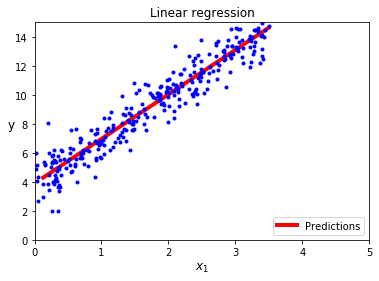

In [129]:
plt.plot(X_new, y_prediction, "r-", linewidth ="4", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0,5,0,15])
plt.title("Linear regression")
plt.legend(loc="lower right")
plt.xlabel("$x_1$", fontsize = 12)
plt.ylabel("y", rotation = 0, fontsize = 12)
plt.show()

## Using Linear Regression from Scikit-Learn

In [130]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X, y)

In [135]:
print(model.coef_, model.intercept_) #Similar to our calculation from the normal equation

[[3.06964842]] [3.88598405]


In [132]:
#Prediction on our new data points
model.predict(X_new)

array([[ 4.28503834],
       [14.59905704]])

In [139]:
#Another way of calculating optimal theta. 
#LinearRegression is based on np.linalg.lstsq

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train, y, rcond=1e-6)
theta_best_svd

array([[3.88598405],
       [3.06964842]])

In [140]:
#Another way of calculating optimal theta. 
np.linalg.pinv(X_train)@y

array([[3.88598405],
       [3.06964842]])

## Batch Gradient Descent implementation

In [155]:
def gradient_calculation(alpha, m):
    theta = np.random.randn(2,1)
    for i in range(0,1000):
        gradient = (2/m) * (X_train.transpose() @ (X_train @ theta - y))
        theta = theta - alpha * gradient
    return theta

In [156]:
gradient_calculation(0.03, 300)

array([[3.88598119],
       [3.06964972]])

In [209]:
#Trying out for different learning rate values

m = 300 #Training set size
alpha_variations = [0.0001, 0.02, 0.1, 0.21]
theta_gradients = []
for alpha in alpha_variations:
    theta_gradients.append(gradient_calculation(alpha, m))
    

In [210]:
theta_gradients

[array([[1.91222905],
        [1.62963222]]),
 array([[3.88553163],
        [3.0698543 ]]),
 array([[3.88598405],
        [3.06964842]]),
 array([[ -6.99842505],
        [-20.8491856 ]])]

In [211]:
#Predicting with the different theta values
def predict_value(X_new_bias, theta):
    return X_new_bias @ theta

[[2.12408124]
 [7.59964548]]
[[ 4.28461269]
 [14.59932313]]
[[ 4.28503834]
 [14.59905704]]
[[ -9.70881918]
 [-79.7620828 ]]


[0, 5, -80, 15]

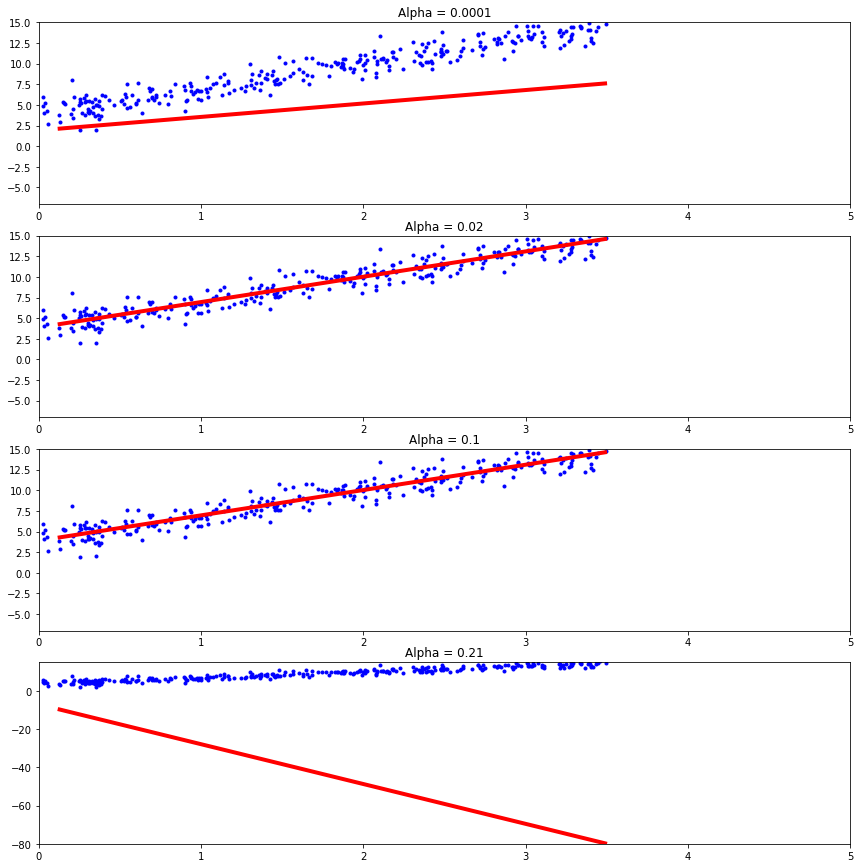

In [219]:
#Plotting to understand how the different alphas affect the convergence and best-fit line
fig, axs=plt.subplots(4,1, figsize=(12,12))
fig.tight_layout()
for i in range(len(alpha_variations)):
    axs[i].plot(X, y, "b.", linewidth ="2", label="Predictions")
    axs[i].set_title("Alpha = " + str(alpha_variations[i]))
    y_prediction = predict_value(X_new_bias, theta_gradients[i])
    print(y_prediction)
    axs[i].plot(X_new, y_prediction, "r-", linewidth ="4", label="Predictions")
    axs[i].axis([0,5,-7,15])

#y_prediction[3] varies a lot from the rest
#Creating a different axis for display purposes.

axs[3].axis([0,5,-80,15])

## Stochastic Gradient Descent implementation